In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [3]:
NUM_CLASSES = 7

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
#delimiter=',' specifies that the data is comma-separated.
#dtype='float32' specifies that the data type of the loaded data is float32.
#usecols=list(range(1, (21 * 2) + 1)) specifies which columns to load from the CSV file. In this case, it loads columns 1 to 42 (since 21 * 2 is 42, and range(1, 43) generates numbers from 1 to 42). These columns are likely to contain the keypoint coordinates for sign language recognition.

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
Total params: 1147 (4.48 KB)
Trainable params: 1147 (4.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# This callback saves the model or model weights at specified intervals during training
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
#This callback stops the training process if the model's performance (on a validation set) does not improve for a specified number of epochs. 
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
11/17 [==================>...........] - ETA: 0s - loss: 2.0841 - accuracy: 0.1768 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 3s 43ms/step - loss: 2.0760 - accuracy: 0.1728 - val_loss: 1.9667 - val_accuracy: 0.2091
Epoch 2/1000
10/17 [================>.............] - ETA: 0s - loss: 2.0073 - accuracy: 0.1508

C:\Users\rpavi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.9879 - accuracy: 0.1542 - val_loss: 1.9283 - val_accuracy: 0.2134
Epoch 3/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.9411 - accuracy: 0.1671
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.9385 - accuracy: 0.1713 - val_loss: 1.9075 - val_accuracy: 0.2148
Epoch 4/1000
15/17 [=========================>....] - ETA: 0s - loss: 1.9125 - accuracy: 0.1943
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.9126 - accuracy: 0.1955 - val_loss: 1.8918 - val_accuracy: 0.2660
Epoch 5/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.8926 - accuracy: 0.2230
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==========

15/17 [=========================>....] - ETA: 0s - loss: 1.2975 - accuracy: 0.4896
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 14ms/step - loss: 1.3007 - accuracy: 0.4888 - val_loss: 1.0248 - val_accuracy: 0.6344
Epoch 30/1000
16/17 [===========================>..] - ETA: 0s - loss: 1.2696 - accuracy: 0.4966
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 14ms/step - loss: 1.2680 - accuracy: 0.4979 - val_loss: 0.9970 - val_accuracy: 0.6230
Epoch 31/1000
16/17 [===========================>..] - ETA: 0s - loss: 1.2550 - accuracy: 0.5029
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 1.2589 - accuracy: 0.5026 - val_loss: 0.9788 - val_accuracy: 0.6643
Epoch 32/1000
15/17 [=========================>....] - ETA: 0s - loss: 1.2426 - accuracy: 0.5078
Epoch

Epoch 56/1000
16/17 [===========================>..] - ETA: 0s - loss: 1.0158 - accuracy: 0.6113
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 1.0178 - accuracy: 0.6094 - val_loss: 0.6583 - val_accuracy: 0.7511
Epoch 57/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.9897 - accuracy: 0.6166
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.9896 - accuracy: 0.6113 - val_loss: 0.6440 - val_accuracy: 0.7795
Epoch 58/1000
10/17 [================>.............] - ETA: 0s - loss: 1.0121 - accuracy: 0.5898
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 1.0129 - accuracy: 0.6013 - val_loss: 0.6361 - val_accuracy: 0.7752
Epoch 59/1000
13/17 [=====================>........] - ETA: 0s - loss: 1.0273 - accuracy

Epoch 83/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.8962 - accuracy: 0.6460
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.9002 - accuracy: 0.6445 - val_loss: 0.5498 - val_accuracy: 0.7881
Epoch 84/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.9275 - accuracy: 0.6313
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.9234 - accuracy: 0.6327 - val_loss: 0.5457 - val_accuracy: 0.8279
Epoch 85/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.9030 - accuracy: 0.6562
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 12ms/step - loss: 0.9007 - accuracy: 0.6559 - val_loss: 0.5467 - val_accuracy: 0.8193
Epoch 86/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.9026 - accuracy

Epoch 110/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.8626 - accuracy: 0.6631
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.8689 - accuracy: 0.6597 - val_loss: 0.4955 - val_accuracy: 0.8250
Epoch 111/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.8803 - accuracy: 0.6528
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.8833 - accuracy: 0.6521 - val_loss: 0.5034 - val_accuracy: 0.8094
Epoch 112/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.8673 - accuracy: 0.6698
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.8655 - accuracy: 0.6711 - val_loss: 0.5060 - val_accuracy: 0.8336
Epoch 113/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.8825 - a

Epoch 137/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.8370 - accuracy: 0.6792
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.8378 - accuracy: 0.6763 - val_loss: 0.4630 - val_accuracy: 0.8549
Epoch 138/1000
16/17 [===========================>..] - ETA: 0s - loss: 0.8401 - accuracy: 0.6660
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.8386 - accuracy: 0.6664 - val_loss: 0.4703 - val_accuracy: 0.8378
Epoch 139/1000
15/17 [=========================>....] - ETA: 0s - loss: 0.8199 - accuracy: 0.6797
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 14ms/step - loss: 0.8266 - accuracy: 0.6782 - val_loss: 0.4676 - val_accuracy: 0.8293
Epoch 140/1000
 1/17 [>.............................] - ETA: 0s - loss: 0.7905 - a

Epoch 164/1000
12/17 [====================>.........] - ETA: 0s - loss: 0.7521 - accuracy: 0.7005
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.7748 - accuracy: 0.6896 - val_loss: 0.4456 - val_accuracy: 0.8549
Epoch 165/1000
 8/17 [=============>................] - ETA: 0s - loss: 0.8166 - accuracy: 0.6797
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 13ms/step - loss: 0.7921 - accuracy: 0.6977 - val_loss: 0.4395 - val_accuracy: 0.8563
Epoch 166/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.7857 - accuracy: 0.6830
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 15ms/step - loss: 0.7893 - accuracy: 0.6872 - val_loss: 0.4407 - val_accuracy: 0.8492
Epoch 167/1000
13/17 [=====================>........] - ETA: 0s - loss: 0.7971 - a

Epoch 191/1000
 9/17 [==============>...............] - ETA: 0s - loss: 0.8040 - accuracy: 0.6866
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 17ms/step - loss: 0.8083 - accuracy: 0.6872 - val_loss: 0.4426 - val_accuracy: 0.8663
Epoch 192/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.7861 - accuracy: 0.6914
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.7792 - accuracy: 0.6958 - val_loss: 0.4373 - val_accuracy: 0.9075
Epoch 193/1000
14/17 [=======================>......] - ETA: 0s - loss: 0.7954 - accuracy: 0.6769
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
17/17 [==============================] - 0s 16ms/step - loss: 0.7956 - accuracy: 0.6815 - val_loss: 0.4482 - val_accuracy: 0.8492
Epoch 193: early stopping


In [12]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

6/6 [==============================] - 0s 3ms/step - loss: 0.4482 - accuracy: 0.8492


In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 246ms/step
[0.0899701  0.10071682 0.00516389 0.02098654 0.6545237  0.09745256
 0.03118643]
4


22/22 [==============================] - 0s 3ms/step


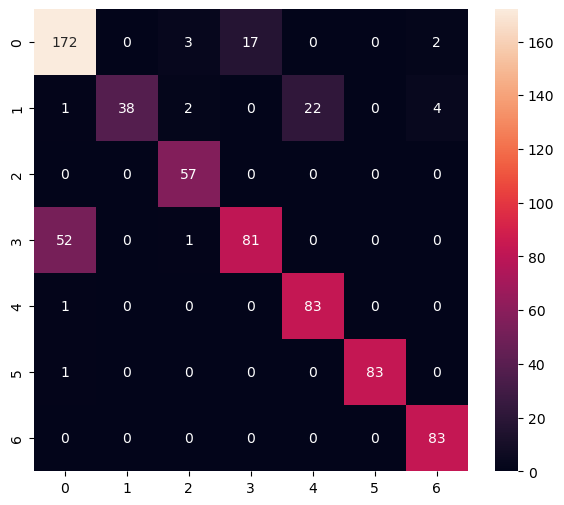

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       194
           1       1.00      0.57      0.72        67
           2       0.90      1.00      0.95        57
           3       0.83      0.60      0.70       134
           4       0.79      0.99      0.88        84
           5       1.00      0.99      0.99        84
           6       0.93      1.00      0.97        83

    accuracy                           0.85       703
   macro avg       0.89      0.86      0.86       703
weighted avg       0.86      0.85      0.84       703



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [16]:

model.save(model_save_path, include_optimizer=False)

C:\Users\rpavi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rpavi\AppData\Local\Temp\tmpd122vmso\assets


INFO:tensorflow:Assets written to: C:\Users\rpavi\AppData\Local\Temp\tmpd122vmso\assets


6676

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.08997008 0.10071688 0.00516389 0.02098655 0.65452355 0.09745255
 0.03118645]
4
